In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data=pd.read_csv('/home/shivam/Downloads/data.csv')

In [69]:
# removing unwanted values
data=data[data['game_season'].isnull()==False]
data=data[data.area_of_shot.isnull()==False]
data=data[data.is_goal==1.0]
data.game_season=data.game_season.str.split('-').str[0].astype(int)

In [70]:
# grouping data by season ranges
seasons=data.groupby(pd.cut(data["game_season"], np.arange(1995, 2015, 3)))
last=data[data.game_season >=2014].area_of_shot.value_counts()

In [71]:
# sorting the ranges in ascending order
sortedSeasonsKey=sorted(seasons.keys.value_counts().index)

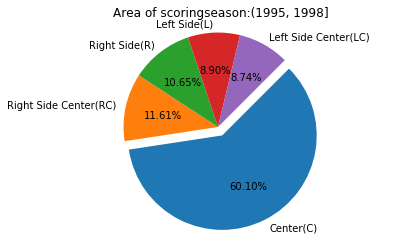

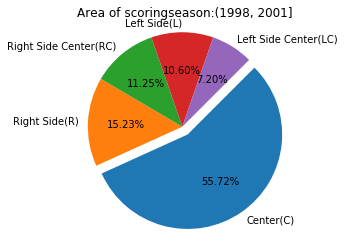

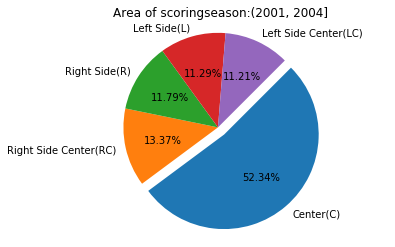

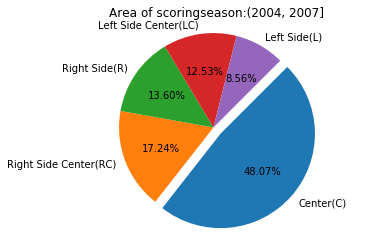

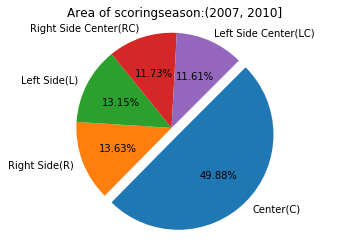

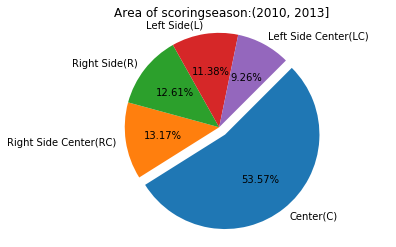

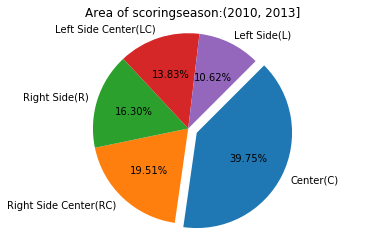

In [75]:
ex=np.array([0.1,0,0,0,0])
title="Area of scoring"
for season in sortedSeasonsKey:
    Labels=seasons.get_group(season).area_of_shot.value_counts().index.values[:5]
    Values=seasons.get_group(season).area_of_shot.value_counts().values[:5]
    plt.pie(Values,labels=Labels,counterclock=False,startangle=45,autopct="%.2f%%",explode=ex)
    plt.axis("equal")
    plt.title(title+"season:"+str(season))
    plt.show()

ex=np.array([0.1,0,0,0,0])
plt.pie(last.values[:5],labels=last.index.values[:5],counterclock=False,startangle=45,autopct="%.2f%%",explode=ex)
plt.axis("equal")
plt.title(title+"season:"+str(season))
plt.show()